In [ ]:
!pip install graphviz
!apt-get install graphviz

Reading package lists... Done
Building dependency tree       
Reading state information... Done
graphviz is already the newest version (2.40.1-2).
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.


In [ ]:
import pandas as pd

uri = 'https://raw.githubusercontent.com/eidsonsa/website-phishing-dataset/master/Website%20Phishing.csv'
dados = pd.read_csv(uri)
dados.head()


,SFH,popUpWidnow,SSLfinal_State,Request_URL,URL_of_Anchor,web_traffic,URL_Length,age_of_domain,having_IP_Address,Result
0,1,-1,1,-1,-1,1,1,1,0,0
1,-1,-1,-1,-1,-1,0,1,1,1,1
2,1,-1,0,0,-1,0,-1,1,0,1
3,1,0,1,-1,-1,0,1,1,0,0
4,-1,-1,1,-1,0,0,-1,1,0,1


In [ ]:
print('(Quantidade de Exemplos, Quantidade de Classes) ->', dados.shape)

(Quantidade de Exemplos, Quantidade de Classes) -> (1353, 10)


In [ ]:
#O número de células não nulas é igual ao número de exemplos em todas as classes, logo, não há dados faltando.

dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1353 entries, 0 to 1352
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   SFH                1353 non-null   int64
 1   popUpWidnow        1353 non-null   int64
 2   SSLfinal_State     1353 non-null   int64
 3   Request_URL        1353 non-null   int64
 4   URL_of_Anchor      1353 non-null   int64
 5   web_traffic        1353 non-null   int64
 6   URL_Length         1353 non-null   int64
 7   age_of_domain      1353 non-null   int64
 8   having_IP_Address  1353 non-null   int64
 9   Result             1353 non-null   int64
dtypes: int64(10)
memory usage: 105.8 KB


In [ ]:
dados.describe()

,SFH,popUpWidnow,SSLfinal_State,Request_URL,URL_of_Anchor,web_traffic,URL_Length,age_of_domain,having_IP_Address,Result
count,1353.000000,1353.000000,1353.000000,1353.000000,1353.000000,1353.000000,1353.000000,1353.000000,1353.000000,1353.000000
mean,0.237990,-0.258684,0.327421,-0.223208,-0.025129,0.000000,-0.053215,0.219512,0.114560,-0.113821
std,0.916389,0.679072,0.822193,0.799682,0.936262,0.806776,0.762552,0.975970,0.318608,0.954773
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000
25%,-1.000000,-1.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000
50%,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,-1.000000
75%,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
from sklearn.model_selection import train_test_split

x = dados[['SFH','popUpWidnow', 'SSLfinal_State', 'Request_URL', 'URL_of_Anchor', 'web_traffic', 'URL_Length', 'age_of_domain', 'having_IP_Address']]
y = dados['Result']

treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, random_state = 20, test_size = 0.25)

print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

Treinaremos com 1014 elementos e testaremos com 339 elementos


Método 1: GaussianNB

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

modeloG = GaussianNB()
modeloG.fit(treino_x, treino_y)
previsoesG = modeloG.predict(teste_x)

acuraciaG = accuracy_score(teste_y, previsoesG)
print('A acurácia do GaussianNB é de %.2f%%' % (acuraciaG * 100))

precisionG = precision_score(teste_y, previsoesG, average='macro')
print('A precisão do GaussianNB é de %.2f%%' % (precisionG * 100))

recallG = recall_score(teste_y, previsoesG, average='macro')
print('O recall do GaussianNB é de %.2f%%' % (recallG * 100))

f1ScoreG = f1_score(teste_y, previsoesG, average='macro')
print('O f1_score do GaussianNB é de %.2f%%' % (f1ScoreG * 100))

A acurácia do GaussianNB é de 81.12%
A precisão do GaussianNB é de 67.17%
O recall do GaussianNB é de 63.92%
O f1_score do GaussianNB é de 64.79%


Método 2: DecisionTreeClassifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

modeloDTC = DecisionTreeClassifier(max_depth=3)
modeloDTC.fit(treino_x, treino_y)
previsoesDTC = modeloDTC.predict(teste_x)

acuraciaDTC = accuracy_score(teste_y, previsoesDTC)
print('A acurácia do DecisionTreeClassifier é de %.2f%%' % (acuraciaDTC * 100))

precisionDTC = precision_score(teste_y, previsoesDTC, average='macro')
print('A precisão do DecisionTreeClassifier é de %.2f%%' % (acuraciaDTC * 100))

recallDTC = recall_score(teste_y, previsoesDTC, average='macro')
print('O recall do DecisionTreeClassifier é de %.2f%%' % (recallDTC * 100))

f1ScoreDTC = f1_score(teste_y, previsoesDTC, average='macro')
print('O f1_score do DecisionTreeClassifier é de %.2f%%' % (f1ScoreDTC * 100))

A acurácia do DecisionTreeClassifier é de 83.19%
A precisão do DecisionTreeClassifier é de 83.19%
O recall do DecisionTreeClassifier é de 60.28%
O f1_score do DecisionTreeClassifier é de 57.58%


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


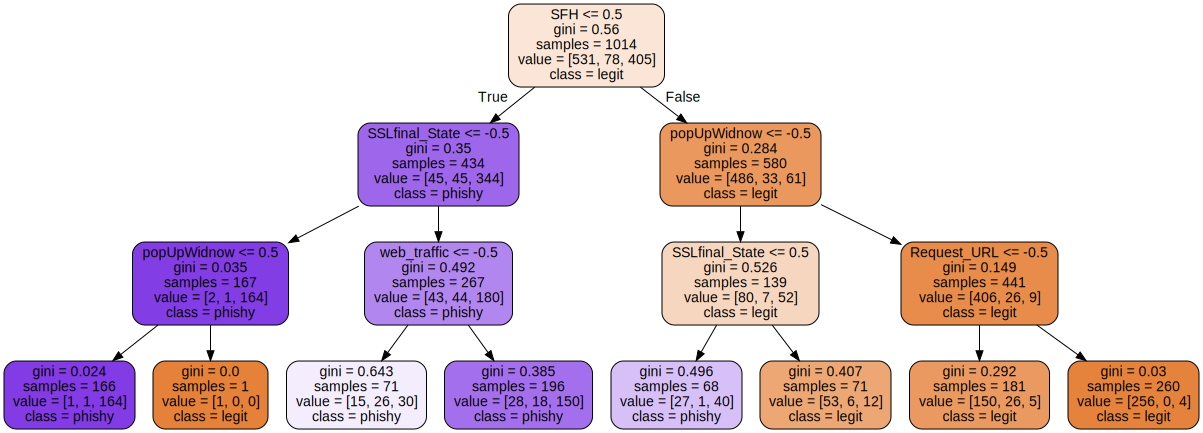

In [ ]:
from sklearn.tree import export_graphviz
import graphviz

dot_data = export_graphviz(modeloDTC, out_file=None,
                           filled = True, rounded = True,
                           feature_names = x.columns,
                          class_names = ["legit", "suspeito", "phishy"])
grafico = graphviz.Source(dot_data)
grafico

Método 3: KNeighborsClassifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

modeloK = KNeighborsClassifier(n_neighbors = 10)
modeloK.fit(treino_x, treino_y)
previsoesK = modeloK.predict(teste_x)

acuraciaK = accuracy_score(teste_y, previsoesK)
print('A acurácia do KNeighborsClassifier é de %.2f%%' % (acuraciaK * 100))

precisionK = precision_score(teste_y, previsoesK, average='macro')
print('A precisão do KNeighborsClassifier é de %.2f%%' % (precisionK * 100))

recallK = recall_score(teste_y, previsoesK, average='macro')
print('O recall do KNeighborsClassifier é de %.2f%%' % (recallK * 100))

f1ScoreK = f1_score(teste_y, previsoesK, average='macro')
print('O f1_score do KNeighborsClassifier é de %.2f%%' % (f1ScoreK * 100))

A acurácia do KNeighborsClassifier é de 88.79%
A precisão do KNeighborsClassifier é de 87.60%
O recall do KNeighborsClassifier é de 82.84%
O f1_score do KNeighborsClassifier é de 84.90%




*   Acuracia = (positivos + negativos) / (positivos + negativos + falso positivos + falso negativos)
> habilidade de acertar uma previsão
*   Precision_Score = positivos / (positivos + falso positivos) ->
> habilidade de não classificar como positivo um sample negativo
*   Recall = positivos / (positivos + falsos negativos)
> habilidade de encontrar os samples positivos
*   F1_score = 2 * (precision_score * recall) / (precision + recall)
> media ponderada do precision_score e do recall


In [ ]:
comparacao_desempenho = pd.DataFrame({'GaussianNB': [acuraciaG, precisionG, recallG, f1ScoreG],
                                      'DTC': [acuraciaDTC, precisionDTC, recallDTC, f1ScoreDTC],
                                      'KNeighborsClassifier': [acuraciaK, precisionK, recallK, f1ScoreK]},
                                     index=['Acuracia', 'Precision_Score', 'Recall', 'F1_score'])

comparacao_desempenho['Melhor resultado'] = comparacao_desempenho.idxmax(axis=1)

comparacao_desempenho


,GaussianNB,DTC,KNeighborsClassifier,Melhor resultado
Acuracia,0.811209,0.831858,0.887906,KNeighborsClassifier
Precision_Score,0.671746,0.558188,0.875952,KNeighborsClassifier
Recall,0.639166,0.602762,0.828365,KNeighborsClassifier
F1_score,0.647873,0.575779,0.848966,KNeighborsClassifier


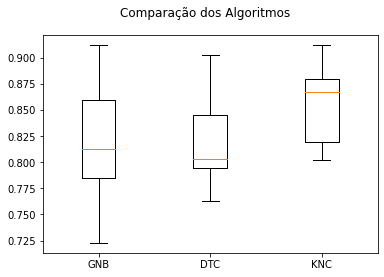

In [ ]:
import matplotlib.pyplot as plt
from sklearn import model_selection


modelos = []
modelos.append(('GNB', modeloG))
modelos.append(('DTC', modeloDTC))
modelos.append(('KNC', modeloK))

resultados = []
nomes = []

for nome, modelo in modelos:
  kfold = model_selection.KFold(n_splits=10)
  cv_resultados = model_selection.cross_val_score(modelo, treino_x, treino_y, cv=kfold, scoring = 'accuracy')
  resultados.append(cv_resultados)
  nomes.append(nome)

fig = plt.figure()
fig.suptitle('Comparação dos Algoritmos')
ax = fig.add_subplot()
plt.boxplot(resultados)
ax.set_xticklabels(nomes)
plt.show()